# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

Before you start, install the some of the required packages. 

In [510]:
# !python -m pip install kaggle==1.6.12

In [511]:
# !pip install --target=/workspace ucimlrepo

**Note:** Restart the kernel to use updated package(s).

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
the primary goal is to analyze and compare the financial success of movies on Netflix versus non-Netflix platforms.

The datasets involved include a combined dataset of Netflix movies and IMDb-listed movies

By check key metrics such as budgets and revenues, the analysis aims to uncover significant differences in financial performance between movies available on Netflix and those that are not.

Finding the right datasets can be time-consuming. Here we provide you with a list of websites to start with. But we encourage you to explore more websites and find the data that interests you.

* Google Dataset Search https://datasetsearch.research.google.com/
* The U.S. Government’s open data https://data.gov/
* UCI Machine Learning Repository https://archive.ics.uci.edu/ml/index.php


### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1**
##### **Netflix Movies and TV Shows**
Type: *CSV File*

Method: *The data was gathered using the "Downloading files" method from Kaggle.* 

Dataset variables:

*   *show_id*
*   *type*
*   *title*
*   *director*
*   *cast*
*   *country*
*   *date_added*
*   *release_year*
*   *rating*
*   *duration*
*   *listed_in*
*   *description*

In [512]:
import pandas as pd
movies_df = pd.read_csv("netflix_titles.csv")


#### Dataset 2
##### **imdb_movies Dataset**

Type: *CSV File* 

Method: *The data was gathered using the "Programmatically downloading files" method from Kaggle source.* 

Dataset variables:

*   *names* 
*   *date_x*
*   *score*
*   *genre*
*   *overview*
*   *crew*
*   *orig_title*
*   *status*
*   *orig_lang*
*   *budget_x*
*   *revenue*
*   *country*

In [513]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi
import zipfile

dataset_name = 'ashpalsingh1525/imdb-movies-dataset'

file_to_download = 'imdb_movies.csv'

folder_name = 'imdb'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

api = KaggleApi()
api.authenticate()

api.dataset_download_file(dataset_name, file_to_download, path=folder_name)

# Unzip the downloaded file
for item in os.listdir(folder_name):
    if item.endswith('.zip'):
        zip_file_path = os.path.join(folder_name, item)
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(folder_name)
        os.remove(zip_file_path)

imdb_movies_df = pd.read_csv('./imdb/imdb_movies.csv')

Dataset URL: https://www.kaggle.com/datasets/ashpalsingh1525/imdb-movies-dataset


Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [514]:
#Optional: store the raw data in your local data store

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:

In [515]:
#FILL IN - Inspecting the dataframe visually
movies_df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [516]:
#FILL IN - Inspecting the dataframe programmatically
movies_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Issue and justification: *Looking at the summary of the movies_df returned by .info we can see that there are only
7976 country
8797 date_added
8804 duration
 (other columns with null value we dont need them)
while there are 8804 entries for the other columns

The date_added column is converted to datetime type for easier manipulation and analysis.*

### Quality Issue 2:

In [517]:
#FILL IN - Inspecting the dataframe visually
imdb_movies_df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [518]:


#FILL IN - Inspecting the dataframe programmatically
imdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


Issue and justification: *Looking ata the summary of the imdb_movies_df returned by .info we can see that there are only
10093  genre and 10122 crew   (other columns with null value we dont need them)
while there are 10178  entries for the other columns

he column date_x could be renamed to something more descriptive like release_date.

Similarly, budget_x might be better named as budget.

Convert date_x (or release_date after renaming) to datetime format if it is intended to be used as a date for analysis.*

### Tidiness Issue 1:

In [519]:
#FILL IN - Inspecting the dataframe visually
movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [520]:
#FILL IN - Inspecting the dataframe programmatically
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Issue and justification: *listed_in column :It's supposed to contain only one genre but there are currently many listed_in in a single cell and you need to explode the column to fi that.*

### Tidiness Issue 2: 

In [521]:
#FILL IN - Inspecting the dataframe visually
imdb_movies_df.head()


,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [522]:
#FILL IN - Inspecting the dataframe programmatically
imdb_movies_df.info()
imdb_movies_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


,score,budget_x,revenue
count,10178.000000,1.017800e+04,1.017800e+04
mean,63.497052,6.488238e+07,2.531401e+08
std,13.537012,5.707565e+07,2.777880e+08
min,0.000000,1.000000e+00,0.000000e+00
25%,59.000000,1.500000e+07,2.858898e+07
50%,65.000000,5.000000e+07,1.529349e+08
75%,71.000000,1.050000e+08,4.178021e+08
max,100.000000,4.600000e+08,2.923706e+09


Issue and justification: *genre It's supposed to contain only one genre but there are currently many genres in a single cell and you need to explode the column to fi that.*

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [523]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes 
# are not impacted
movies_df_copy =movies_df
imdb_movies_df_copy =imdb_movies_df

### **Quality Issue 1: null value**

In [524]:
# FILL IN - Apply the cleaning strategy
movies_df = movies_df.dropna(subset=['country'])


movies_df['duration'].fillna(0, inplace=True)

date_added_mode = movies_df['date_added'].mode()[0]
movies_df['date_added'].fillna(date_added_mode, inplace=True)

movies_df['date_added'] = pd.to_datetime(movies_df['date_added'], errors='coerce').dt.date


C:\Users\Tareq\AppData\Local\Temp\ipykernel_10212\1131281912.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['duration'].fillna(0, inplace=True)
C:\Users\Tareq\AppData\Local\Temp\ipykernel_10212\1131281912.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['date_added'].fillna(date_added_mode, inplace=True)
C:\Users\Tareq\AppData\Local\Temp\ipykernel_10212\1131281912.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [525]:
# FILL IN - Validate the cleaning was successful
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7976 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7976 non-null   object
 1   type          7976 non-null   object
 2   title         7976 non-null   object
 3   director      5751 non-null   object
 4   cast          7305 non-null   object
 5   country       7976 non-null   object
 6   date_added    7891 non-null   object
 7   release_year  7976 non-null   int64 
 8   rating        7973 non-null   object
 9   duration      7976 non-null   object
 10  listed_in     7976 non-null   object
 11  description   7976 non-null   object
dtypes: int64(1), object(11)
memory usage: 810.1+ KB


Justification: *we cant fill the null value so we drop it and we change the format to be easy to compatible and analysis*

### **Quality Issue 2: null value**

In [526]:
#FILL IN - Apply the cleaning strategy
imdb_movies_df = imdb_movies_df.dropna(subset=['genre'])

imdb_movies_df.rename(columns={'date_x': 'release_date', 'budget_x': 'budget'}, inplace=True)

# Convert 'release_date' to datetime format
imdb_movies_df['release_date'] = pd.to_datetime(imdb_movies_df['release_date'], errors='coerce').dt.date

C:\Users\Tareq\AppData\Local\Temp\ipykernel_10212\878697859.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_movies_df.rename(columns={'date_x': 'release_date', 'budget_x': 'budget'}, inplace=True)
C:\Users\Tareq\AppData\Local\Temp\ipykernel_10212\878697859.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_movies_df['release_date'] = pd.to_datetime(imdb_movies_df['release_date'], errors='coerce').dt.date


In [527]:
#FILL IN - Validate the cleaning was successful
imdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10093 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   names         10093 non-null  object 
 1   release_date  10093 non-null  object 
 2   score         10093 non-null  float64
 3   genre         10093 non-null  object 
 4   overview      10093 non-null  object 
 5   crew          10052 non-null  object 
 6   orig_title    10093 non-null  object 
 7   status        10093 non-null  object 
 8   orig_lang     10093 non-null  object 
 9   budget        10093 non-null  float64
 10  revenue       10093 non-null  float64
 11  country       10093 non-null  object 
dtypes: float64(3), object(9)
memory usage: 1.0+ MB


Justification: *we cant fill the null value so we drop it and change name of columns to be easy to understand and format to be easy to compatible and analysis*

### **Tidiness Issue 1: multy value**

In [528]:
#FILL IN - Apply the cleaning strategy
def extract_first_value(val):
    if isinstance(val, str):
        return val.split(',')[0].strip()  
    else:
        return val
    
movies_df['listed_in'] = movies_df['listed_in'].apply(extract_first_value)


C:\Users\Tareq\AppData\Local\Temp\ipykernel_10212\155003473.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['listed_in'] = movies_df['listed_in'].apply(extract_first_value)


In [529]:
#FILL IN - Validate the cleaning was successful
movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,British TV Shows,A talented batch of amateur bakers face off in...


Justification: *make each column contain one value*

### **Tidiness Issue 2: multy value**

In [530]:
#FILL IN - Apply the cleaning strategy

imdb_movies_df['genre'] = imdb_movies_df['genre'].apply(extract_first_value)


C:\Users\Tareq\AppData\Local\Temp\ipykernel_10212\4067847914.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_movies_df['genre'] = imdb_movies_df['genre'].apply(extract_first_value)


In [531]:
#FILL IN - Validate the cleaning was successful
imdb_movies_df

,names,release_date,score,genre,overview,crew,orig_title,status,orig_lang,budget,revenue,country
0,Creed III,2023-03-02,73.0,Drama,"After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,2022-12-15,78.0,Science Fiction,Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,2023-04-05,76.0,Animation,"While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,2023-01-05,70.0,Animation,"Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,2023-03-17,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US
...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,2016-12-28,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9.353729e+06,US
10174,Delta Force 2: The Colombian Connection,1990-08-24,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6.698361e+06,US
10175,The Russia House,1990-12-21,61.0,Drama,"Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,2.299799e+07,US
10176,Darkman II: The Return of Durant,1995-07-11,55.0,Action,Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,4.756613e+08,US


Justification: *make each column contain one value*

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [532]:
#FILL IN - Remove unnecessary variables and combine datasets
movies_df =movies_df[['type', 'title', 'country', 'date_added']]

imdb_movies_df =imdb_movies_df[['release_date','orig_title', 'score', 'country', 'genre', 'budget','revenue']]


#Perform an inner merge to keep only rows with matching dates
merged_df = pd.merge(imdb_movies_df, movies_df, left_on='orig_title', right_on='title', how='left')

#drop the 'date_added' column as it's duplicated q after the merge
merged_df.drop(columns=['orig_title'], inplace=True)

In [533]:
merged_df

,release_date,score,country_x,genre,budget,revenue,type,title,country_y,date_added
0,2023-03-02,73.0,AU,Drama,75000000.0,2.716167e+08,NaN,NaN,NaN,NaN
1,2022-12-15,78.0,AU,Science Fiction,460000000.0,2.316795e+09,NaN,NaN,NaN,NaN
2,2023-04-05,76.0,AU,Animation,100000000.0,7.244590e+08,NaN,NaN,NaN,NaN
3,2023-01-05,70.0,AU,Animation,12300000.0,3.420000e+07,NaN,NaN,NaN,NaN
4,2023-03-17,61.0,US,Action,77000000.0,3.409420e+08,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
10088,2016-12-28,73.0,US,Drama,7000000.0,9.353729e+06,Movie,20th Century Women,United States,2019-06-28
10089,1990-08-24,54.0,US,Action,9145817.8,6.698361e+06,NaN,NaN,NaN,NaN
10090,1990-12-21,61.0,US,Drama,21800000.0,2.299799e+07,NaN,NaN,NaN,NaN
10091,1995-07-11,55.0,US,Action,116000000.0,4.756613e+08,NaN,NaN,NaN,NaN


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [534]:
#FILL IN - saving data
merged_df.to_csv('merged.csv', index=False, encoding="utf-8")


## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* How do the budgets and revenues of Netflix movies compared to non-Netflix movies? Is there a significant difference in the financial success of movies on these platforms?

C:\Users\Tareq\AppData\Local\Temp\ipykernel_10212\1999005299.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movies['platform'] = 'Netflix'
C:\Users\Tareq\AppData\Local\Temp\ipykernel_10212\1999005299.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_netflix_movies['platform'] = 'Non-Netflix'


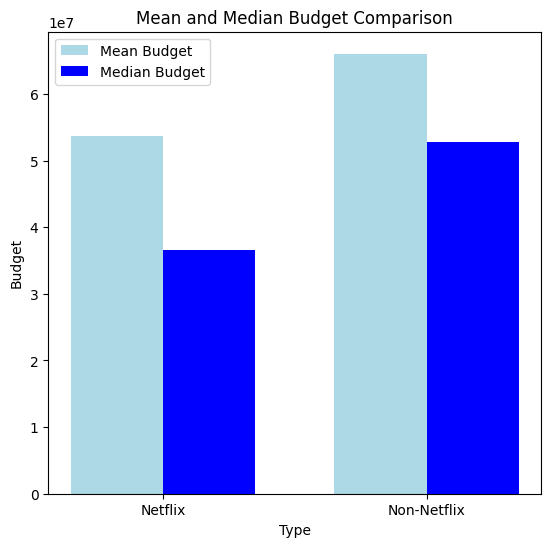

In [535]:
import matplotlib.pyplot as plt

netflix_movies = merged_df.dropna(subset=['date_added'])
non_netflix_movies = merged_df[merged_df['date_added'].isna()]

# Add a column platform between Netflix and non-Netflix movies
netflix_movies['platform'] = 'Netflix'
non_netflix_movies['platform'] = 'Non-Netflix'

combined_df = pd.concat([netflix_movies, non_netflix_movies])


# Calculate the mean and median budget and revenue for Netflix and non-Netflix movies
budget_revenue_stats = {
    'Type': ['Netflix', 'Non-Netflix'],
    'Mean Budget': [netflix_movies['budget'].mean(), non_netflix_movies['budget'].mean()],
    'Median Budget': [netflix_movies['budget'].median(), non_netflix_movies['budget'].median()],
    'Mean Revenue': [netflix_movies['revenue'].mean(), non_netflix_movies['revenue'].mean()],
    'Median Revenue': [netflix_movies['revenue'].median(), non_netflix_movies['revenue'].median()]
}

# Convert the stats to a DataFrame for easy plotting
budget_revenue_df = pd.DataFrame(budget_revenue_stats)

# Plotting
plt.figure(figsize=(14, 6))

# Subplot for Budget
plt.subplot(1, 2, 1)
bar_width = 0.35
index = range(len(budget_revenue_df['Type']))

# Bar for Mean Budget
plt.bar(index, budget_revenue_df['Mean Budget'], bar_width, label='Mean Budget', color='lightblue')

# Bar for Median Budget
plt.bar([i + bar_width for i in index], budget_revenue_df['Median Budget'], bar_width, label='Median Budget', color='blue')

plt.xlabel('Type')
plt.ylabel('Budget')
plt.title('Mean and Median Budget Comparison')
plt.xticks([i + bar_width / 2 for i in index], budget_revenue_df['Type'])
plt.legend()


*Answer to research question:*
after visualizations we found

 avg mean for netflix Budget near 5.3 *10^7

 avg mean for non-netflix Budget near 6.5 *10^7

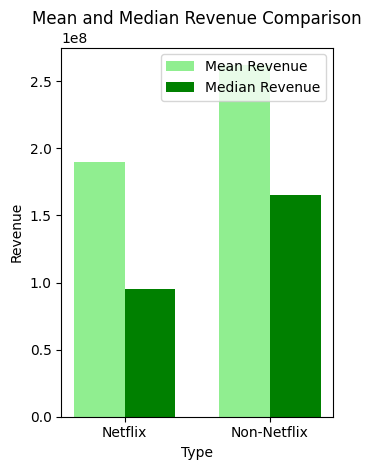

In [536]:

# Subplot for Revenue
plt.subplot(1, 2, 2)

# Bar for Mean Revenue
plt.bar(index, budget_revenue_df['Mean Revenue'], bar_width, label='Mean Revenue', color='lightgreen')

# Bar for Median Revenue
plt.bar([i + bar_width for i in index], budget_revenue_df['Median Revenue'], bar_width, label='Median Revenue', color='green')

plt.xlabel('Type')
plt.ylabel('Revenue')
plt.title('Mean and Median Revenue Comparison')
plt.xticks([i + bar_width / 2 for i in index], budget_revenue_df['Type'])
plt.legend()

plt.tight_layout()
plt.show()

*Answer to research question:*

 avg mean for netflix Revenue near 1.8 *10^8

 avg mean for non-netflix Revenue near 2.6 *10^8

 after some calculation netflix earn near 3.4 times of budget while non-netflix earn near 4


### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* 
- If I had more time to complete the project, I would delve deeper into improving data quality by addressing inconsistencies in genre categorization across datasets and ensuring all columns have consistent formatting and completeness.

- Structural issues such as handling missing values in key fields like date_added and exploring methods to enhance genre classification accuracy would be a priority. 

- I would also explore research questions such as how genre popularity varies over time based on release year and platform availability, and how these factors influence viewer preferences and ratings.